## Imports

In [114]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime

%matplotlib inline
from sklearn_extra.cluster import KMedoids

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
import builtins

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist

## Expolarity data analysis

In [115]:
data = pd.read_csv("supermarket_sales.csv")
data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [116]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Change the  date colum to date time


In [117]:
data["Time"] = data["Time"].astype(str)
data["Date"] = data["Date"].astype(str)

# Now, perform the addition operation
data["DateTime"] = pd.to_datetime(data["Date"] + " " + data["Time"])
data.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                               object
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
DateTime                   datetime64[ns]
dtype: object

In [118]:
data["DateTime"] = data["DateTime"].dt.strftime("%Y-%m-%d %H:%M")
print(data["DateTime"])

0      2019-01-05 13:08
1      2019-03-08 10:29
2      2019-03-03 13:23
3      2019-01-27 20:33
4      2019-02-08 10:37
             ...       
995    2019-01-29 13:46
996    2019-03-02 17:16
997    2019-02-09 13:22
998    2019-02-22 15:33
999    2019-02-18 13:28
Name: DateTime, Length: 1000, dtype: object


## we drop time and date columns to replace them with date time column

In [119]:
data = data.drop(["Date", "Time"], axis=1)
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,DateTime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37


## finding the null values   

In [120]:
cols = data.columns
data[cols].isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
DateTime                   0
dtype: int64

## finding the duplicated values

In [121]:
data.duplicated().sum()

0

## finding the statistics about the data

In [122]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## finding the correlation matrix  between quantative values

In [123]:
l = data[["Unit price", "Quantity", "Tax 5%", "cogs"]]
l.corr()

,Unit price,Quantity,Tax 5%,cogs
Unit price,1.000000,0.010778,0.633962,0.633962
Quantity,0.010778,1.000000,0.705510,0.705510
Tax 5%,0.633962,0.705510,1.000000,1.000000
cogs,0.633962,0.705510,1.000000,1.000000


## making boxplot for quantitave data
### we found outliars in totsl,cogsand tax 5% 


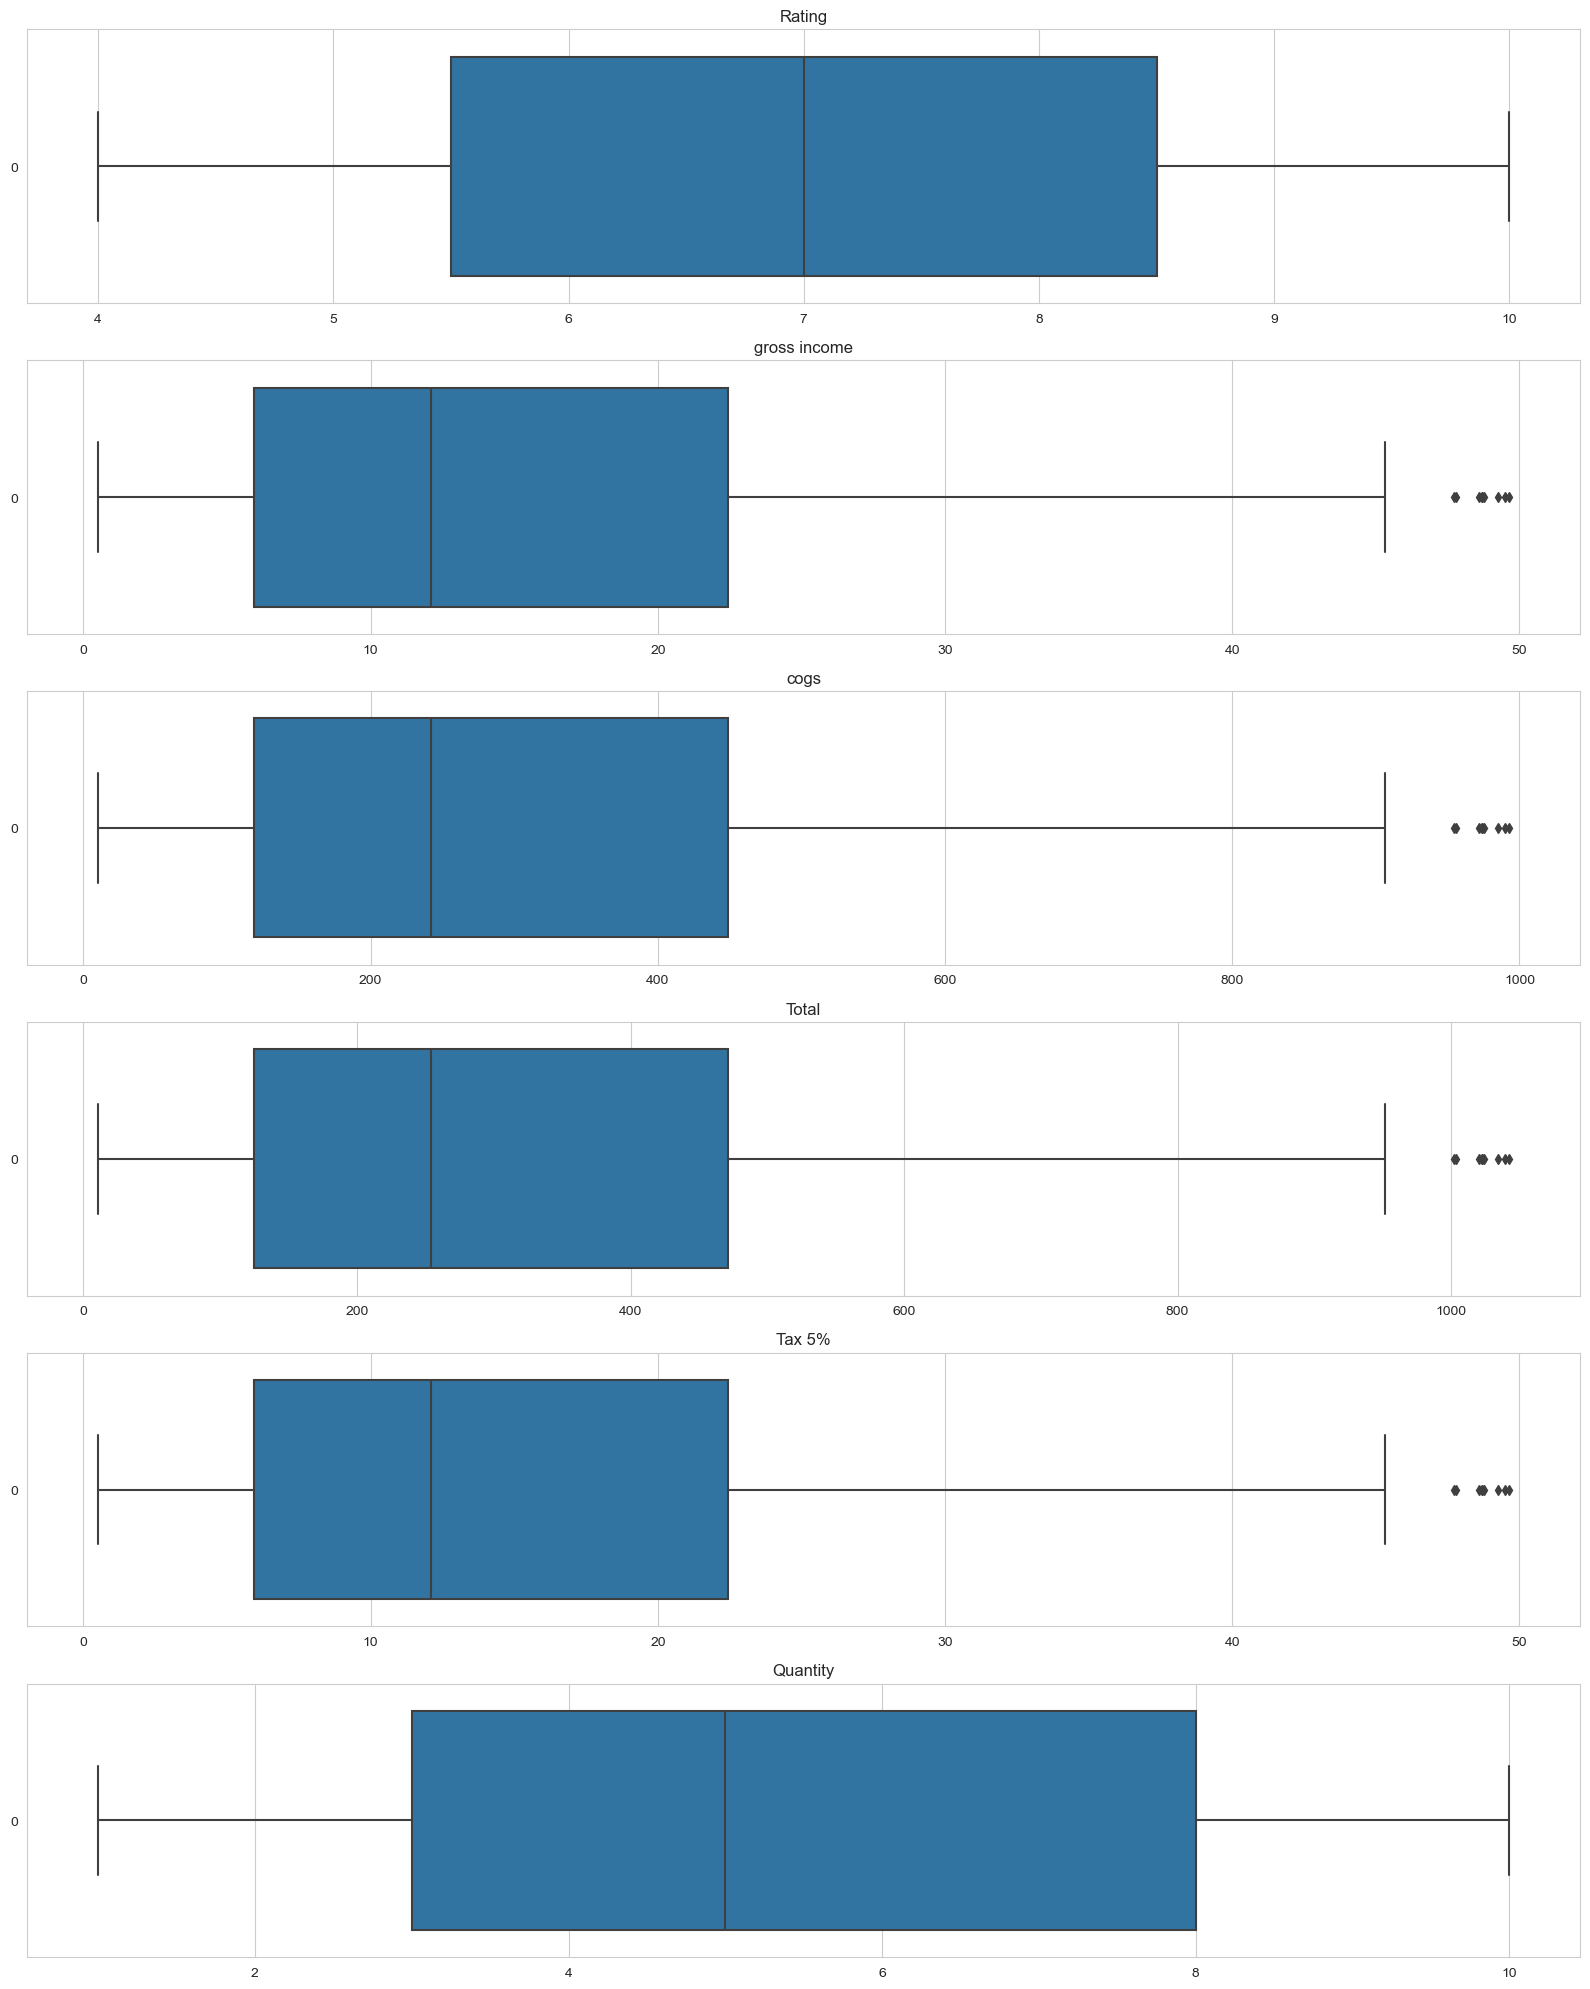

In [124]:
# boxplot forcpi
fig, axis = plt.subplots(6, figsize=(16, 20))
X = data[
    [
        "Rating",
        "gross income",
        "cogs",
        "Total",
        "Tax 5%",
        "Quantity",
    ]
]
for i, column in enumerate(X):
    sns.boxplot(data[column], ax=axis[i], orient="h")
    axis[i].set_title(column)

plt.tight_layout()
plt.show()

## claculate the median of quantitve data to use it in removing outliars

In [125]:
data_outliars = data[["cogs", "Tax 5%", ]]
medians = data_outliars.median()

print(medians)

cogs      241.760
Tax 5%     12.088
dtype: float64


## we use interquartile range method to idetify outliars in each column
### we replace outliars with the median

In [126]:
# Identify outliers using the interquartile range (IQR) method for each column
for col in medians.index:
    Q1 = data_outliars[col].quantile(0.25)
    Q3 = data_outliars[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data_outliars[
        (data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)
    ]
    # Replace outliers with the median value of the column
    data.loc[outliers.index, col] = medians[col]

# Verify that outliers have been replaced
print(data.describe())

        Unit price     Quantity       Tax 5%        Total         cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.049521   322.966749   300.990420   
std      26.494628     2.923431    11.271937   245.885335   225.438749   
min      10.080000     1.000000     0.508500    10.678500    10.170000   
25%      32.875000     3.000000     5.924875   124.422375   118.497500   
50%      55.230000     5.000000    12.084000   253.848000   241.680000   
75%      77.935000     8.000000    22.041000   471.350250   440.820000   
max      99.960000    10.000000    45.325000  1042.650000   906.500000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.

## we make new boxplot to be sure that every outliar has been removed

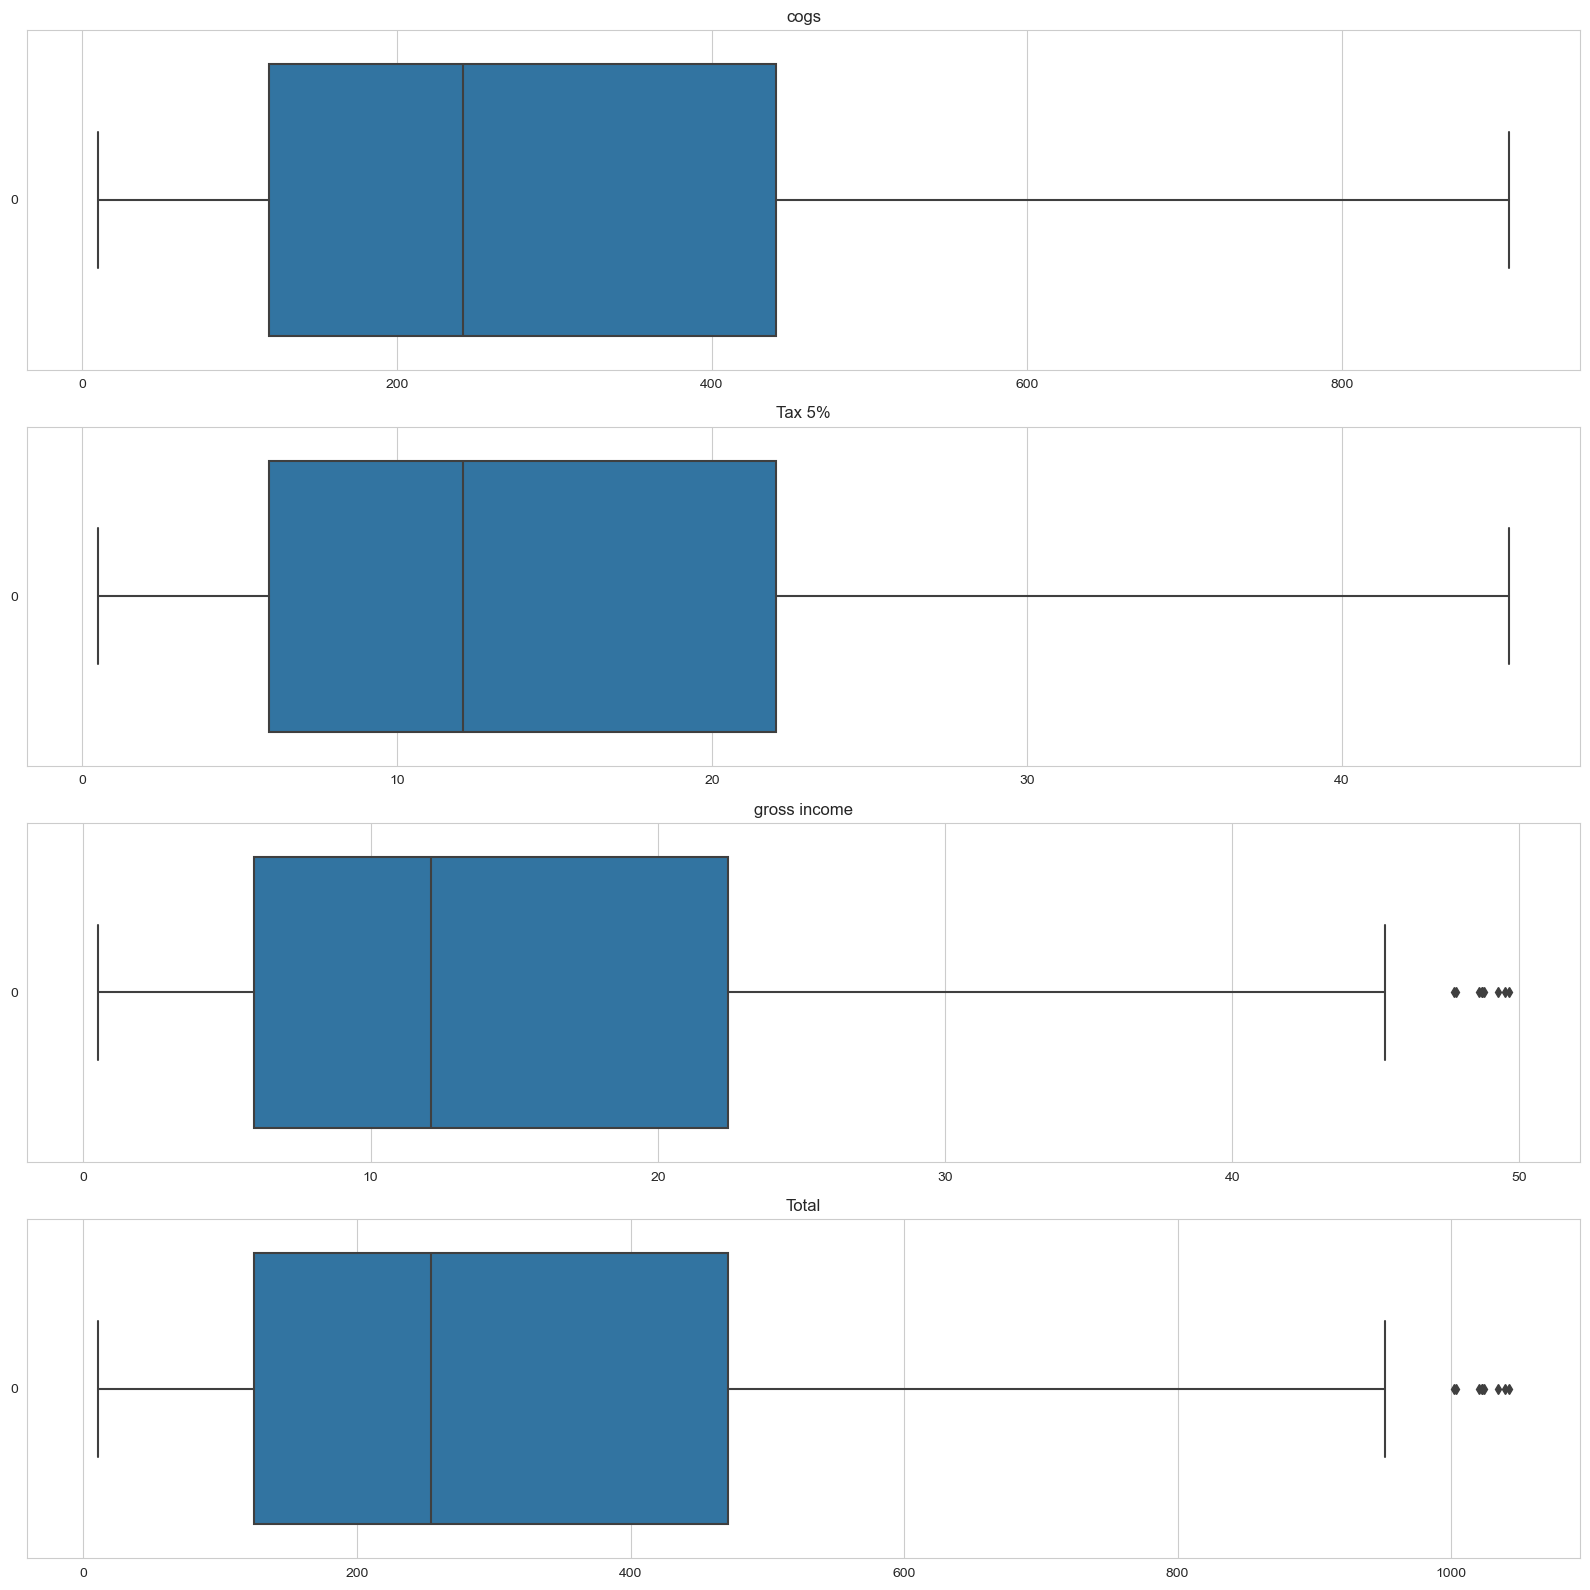

In [127]:
# boxplot forcpi
fig, axis = plt.subplots(4, figsize=(16, 16))
X = data[["cogs", "Tax 5%", "gross income", "Total"]]
for i, column in enumerate(X):
    sns.boxplot(data[column], ax=axis[i], orient="h")
    axis[i].set_title(column)

plt.tight_layout()
plt.show()

## show correlation matrix

- ### there is approximately no correlation between ratings and other variables and between unit price and quantity

- ### the correlation between the total and cogs and gross income and tax 5% is strong and positive

- ### the correlation is medium and positive in the parts where the value is 0.69

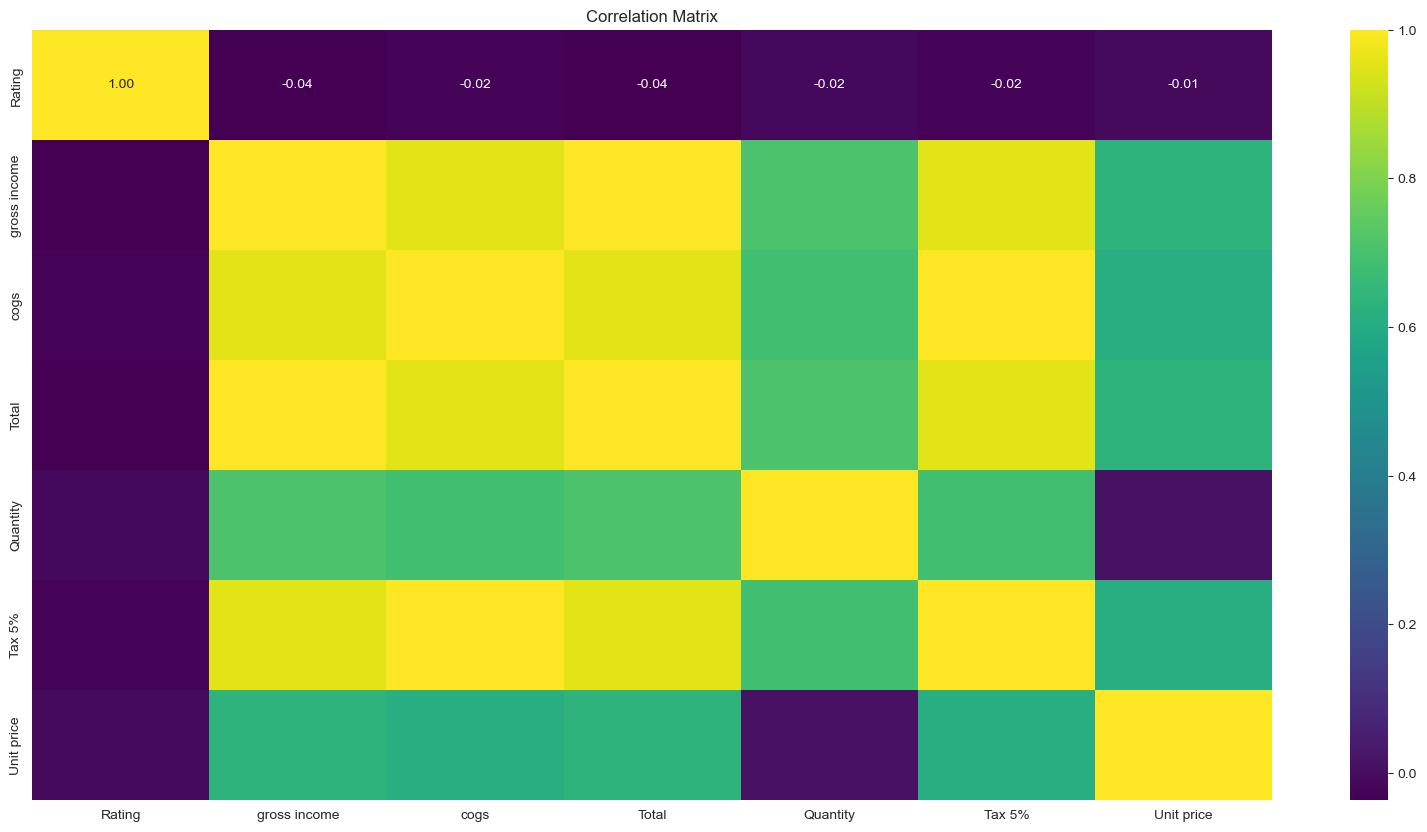

In [128]:
df = data[
    [
        "Rating",
        "gross income",
        "cogs",
        "Total",
        "Quantity",
        "Tax 5%",
        "Unit price",
    ]
]


def plotCorrelationMatrix(df, figsize):
    corr_matrix = df.corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

# Replace df1 with your DataFrame name
plotCorrelationMatrix(df, (20, 10))

## exploring number of transaction by each branch.


- ### the graph shows the distribution of sales across different product lines.
- ### each bar represents a product line, and the height of the bar represents the count of sales for that product line.
- ### we can from the following graph identify the max product line sales and the min one.
- ### as it is clear here the fashion accessoires product line has the most times of sales with more than 175 times and the lowest is health and beauty product line with 150 times so in general the product lines times of purchase are between 150 and 175 or more slightly

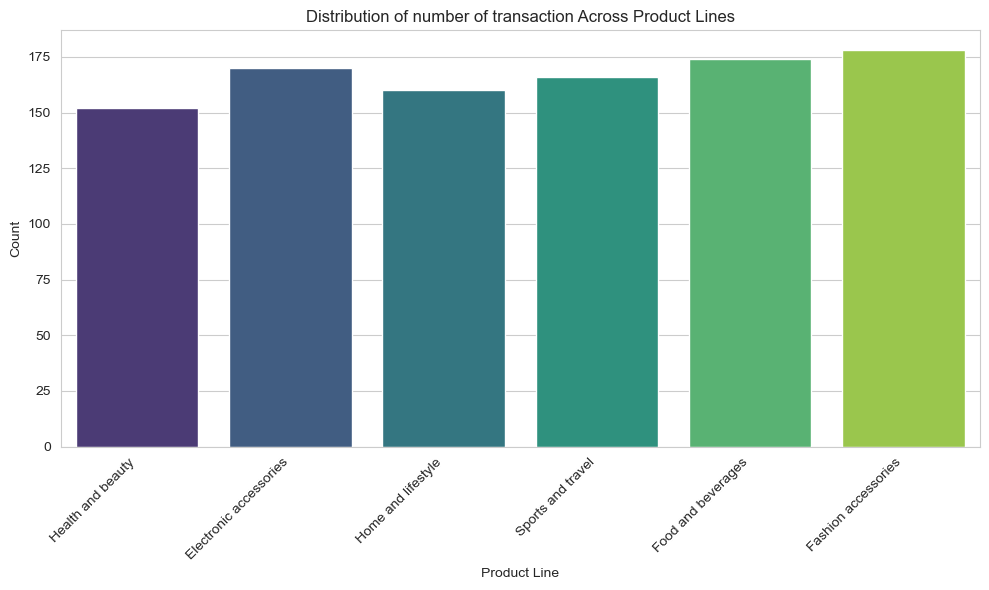

In [129]:
# Set the style of the plot
sns.set_style("whitegrid")

# Plot the distribution of sales across different product lines
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Product line", palette="viridis")
plt.title("Distribution of number of transaction Across Product Lines")
plt.xlabel("Product Line")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## checking which product line has most total gross income

- ### the following graph shows as the total income for each product line.
- ### as it is clear here the heighest in total sales is food and beverages line with more than 2500 and the lowest is health and beauty with more than 2300 and most of the lines are near to the range of 2500

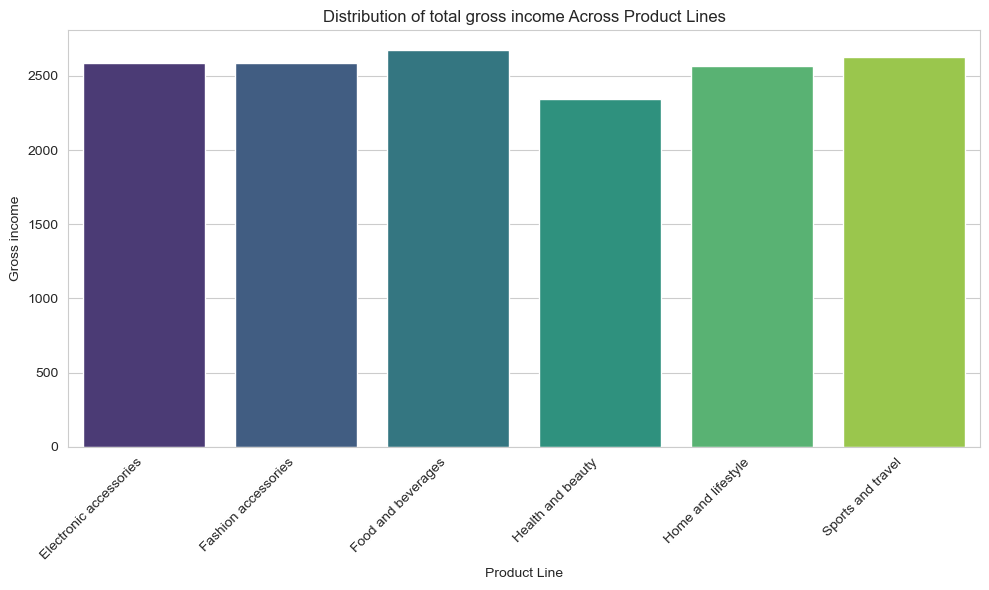

In [130]:
gross_income_by_product = (
    data.groupby("Product line")["gross income"].sum().reset_index()
)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=gross_income_by_product, x="Product line", y="gross income", palette="viridis"
)
plt.title("Distribution of total gross income Across Product Lines")
plt.xlabel("Product Line")
plt.ylabel("Gross income")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## gross income by branch or city as the each city has a letter specific for it in the branch column
- ### A is for Mandalay, B is for Naypyitaw, and C is for Yangon

- ### this pie chart shows the three cities are nearby equal in the total income

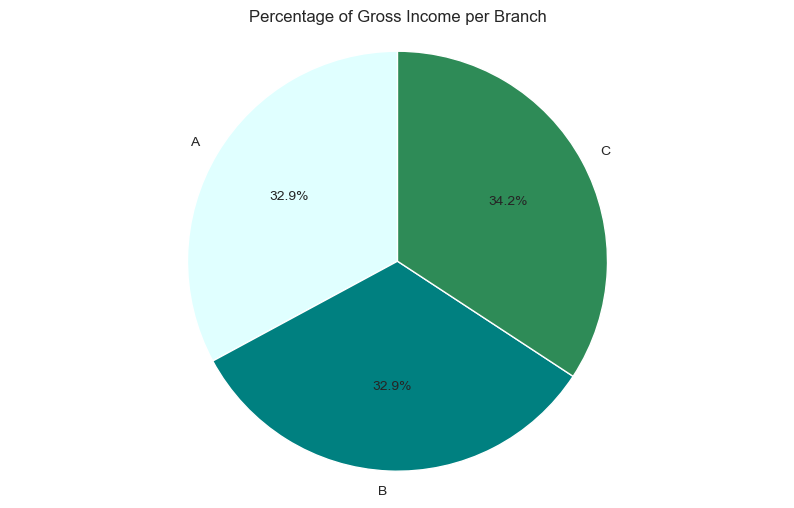

In [131]:
total_gross_income_per_branch = data.groupby("Branch")["gross income"].sum()

# pie chart
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
plt.pie(
    total_gross_income_per_branch,
    labels=total_gross_income_per_branch.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["lightcyan", "teal", "seagreen"],
)
plt.title("Percentage of Gross Income per Branch")
plt.axis("equal")
plt.show()

## transaction per payment type
- ### as it is clear here the payment by Cash and Ewallet are slightly equal although Ewallet is more and Credit card comes in the 3rd place per usage in payments, in general all of the three types can be considered equal

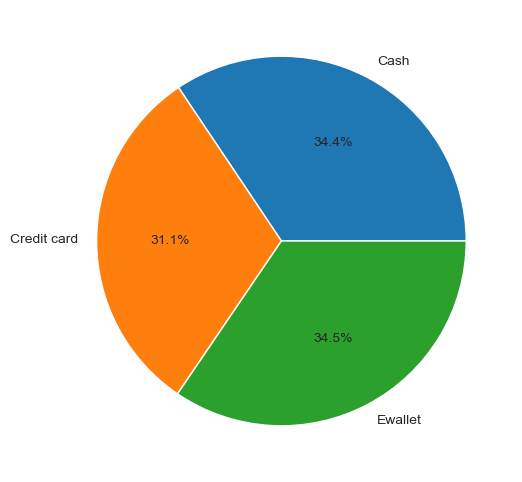

In [132]:
transaction_per_payment_type = data.groupby("Payment")["Invoice ID"].count()
plt.figure(figsize=(6, 6))
plt.pie(
    transaction_per_payment_type,

    labels=transaction_per_payment_type.index,
    autopct="%1.1f%%",
)

plt.show()

## quantities sold per product line

In [133]:
quantities_sold_per_product = (
    data.groupby("Product line")["Quantity"].sum().reset_index()
)
quantities_sold_per_product

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911
5,Sports and travel,920


# average rating per product line

In [134]:
rating_per_product_line = data.groupby("Product line")["Rating"].mean().reset_index()
rating_per_product_line

,Product line,Rating
0,Electronic accessories,6.924706
1,Fashion accessories,7.029213
2,Food and beverages,7.113218
3,Health and beauty,7.003289
4,Home and lifestyle,6.837500
5,Sports and travel,6.916265


## male and female customers spent money based on different product categories.

- #### as it is clear here both genders in spending on electronic accessoires are slightly equal(26500) and the same in sports and travel(27000) but in fashion accessoires(23000 male and 29000 male) and food and berverages (23000 male and 33000 male)and home and lifestyle the female spending on these product lines are more than males and that make sense as the interests and roles of each gender differs but in health and beauty line we see that males approximately like two times the females in spending.

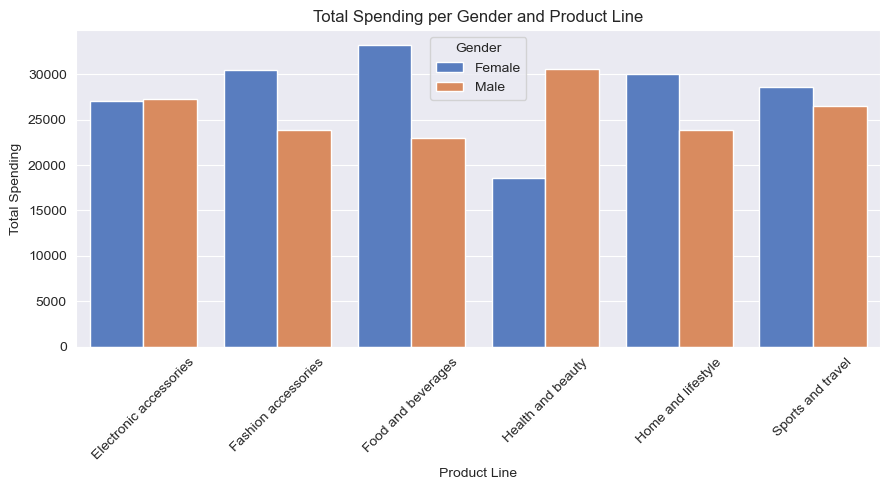

In [135]:
total_spending_per_gender = (
    data.groupby(["Gender", "Product line"])["Total"].sum().reset_index()
)
plt.figure(figsize=(9, 5))
sns.barplot(
    data=total_spending_per_gender,
    x="Product line",
    y="Total",
    hue="Gender",
    palette="muted",
)
plt.xlabel("Product Line")
plt.ylabel("Total Spending")
plt.title("Total Spending per Gender and Product Line")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# Quantity Distribution by Product Line

- ####  it is clear that the following pie chart shows the percentage of quantities purchased from each product line in general they are between 16.4 and 17.6 and they are approximately considred equal and the heighest line by quantity is electronic accessoire and the lowest is health and beauty

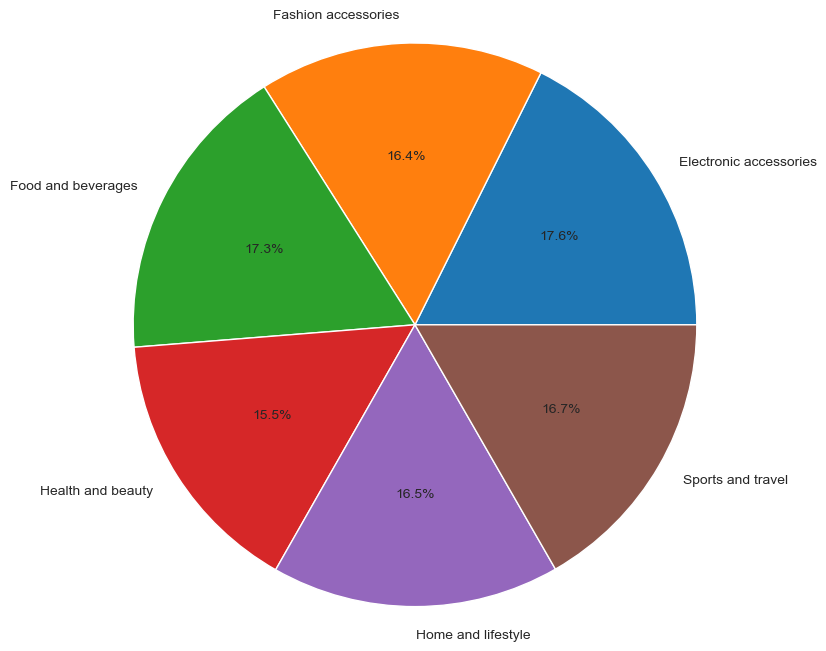

In [136]:
product_line_quantity = data.groupby("Product line")["Quantity"].sum().reset_index()
product_line_quantity

plt.figure(figsize=(8, 8))
plt.pie(
    product_line_quantity["Quantity"],
    labels=product_line_quantity["Product line"],
    autopct="%1.1f%%",
)
plt.axis("equal")
plt.show()

# total sales over time

- #### in the following code we got the total income per date and it divide the data into 4 sections while graphing it so it is easy to see the result more precisely 

- #### in general the total income is about 800 and in some cases it becomes over 800 and in two times it is about 1200

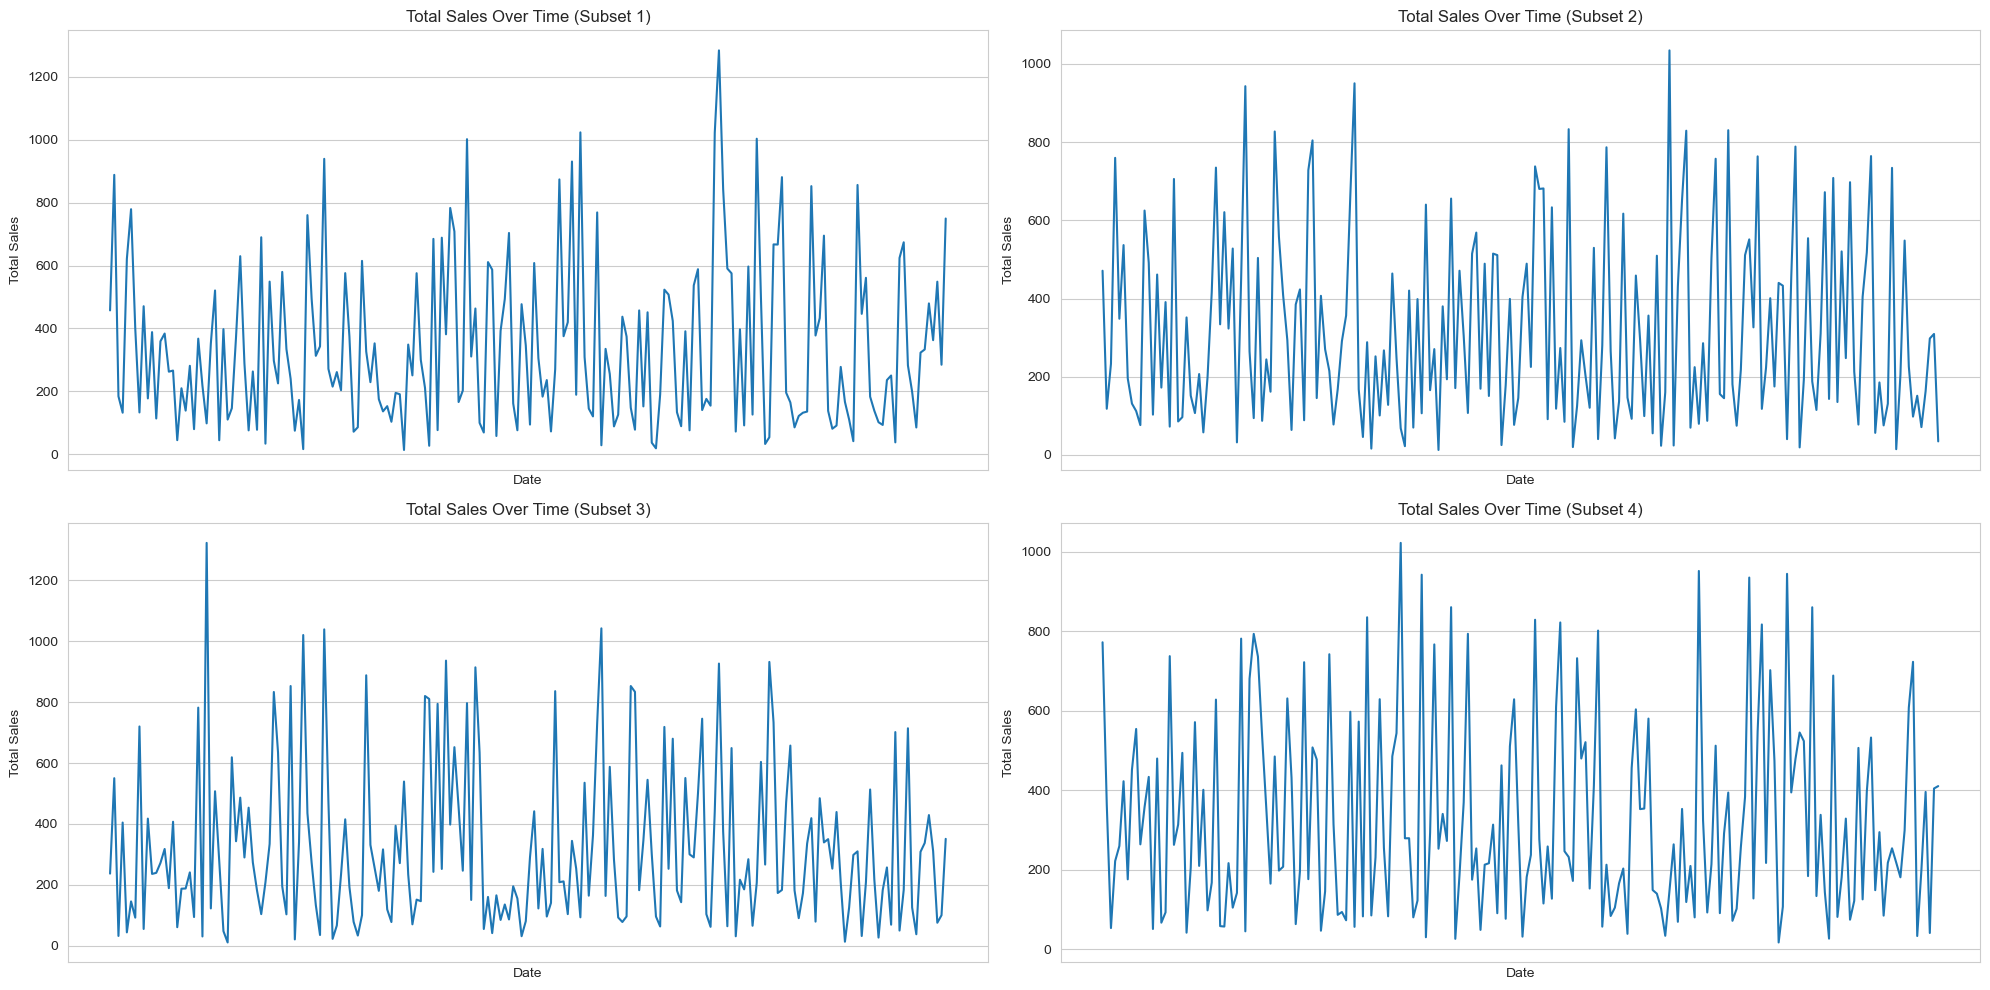

In [137]:
sales_per_day = data.groupby("DateTime")["Total"].sum().reset_index()
sns.set_style("whitegrid")

# Define the number of rows to plot in each iteration
plot_interval = 200

# Calculate the total number of iterations
num_iterations = len(sales_per_day) // plot_interval

# Calculate the number of rows and columns for subplots
nrows = (num_iterations + 1) // 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))
for i in range(num_iterations):
    start_index = i * plot_interval
    end_index = (i + 1) * plot_interval
    subset = sales_per_day[start_index:end_index]

    row = i // ncols
    col = i % ncols

    sns.lineplot(data=subset, x="DateTime", y="Total", ax=axes[row, col])
    axes[row, col].set_title(f"Total Sales Over Time (Subset {i+1})")
    axes[row, col].set_xlabel("Date")
    axes[row, col].set_ylabel("Total Sales")
    axes[row, col].set_xticks([])
    axes[row, col].set_xticklabels([])

plt.tight_layout()
plt.show()

## convert on date time to hour so we know the time in hours for each transaction

In [138]:
# Define a function to extract hour from datetime string
def extract_hour(datetime_str):
    datetime_obj = datetime.strptime(datetime_str, "%Y-%m-%d %H:%M")
    return datetime_obj.hour


# Apply the function to the "DateTime" column to create the "Hour" column
data["Hour"] = data["DateTime"].apply(extract_hour)
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,DateTime,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37,10


In [139]:
max = data["Hour"].max()
min = data["Hour"].min()
print("max = ", max, " min = ", min)

max =  20  min =  10


## average Quantity Sold by Product Line Across All Working Hours

- ### as the graph shows 
   - #### the food and beverages are being purchased most in 11 and 15 hours
   - #### and the health and beauty is considered consistent except in time range 14:30 to 17
   - #### electronic accessoires is considered consistent but it increases slightly between 18 and 19 and from 19 and after it back to normal
   - #### home and lifestyle it increases in range of 15 to 17 and 18 to 19
   - #### sports and travel  it becomes less in 16 to 18 and it increases on average in18 to 19
   - #### fashion accessoires it 14 to 17 dramatically changes by decreasing and increasing 

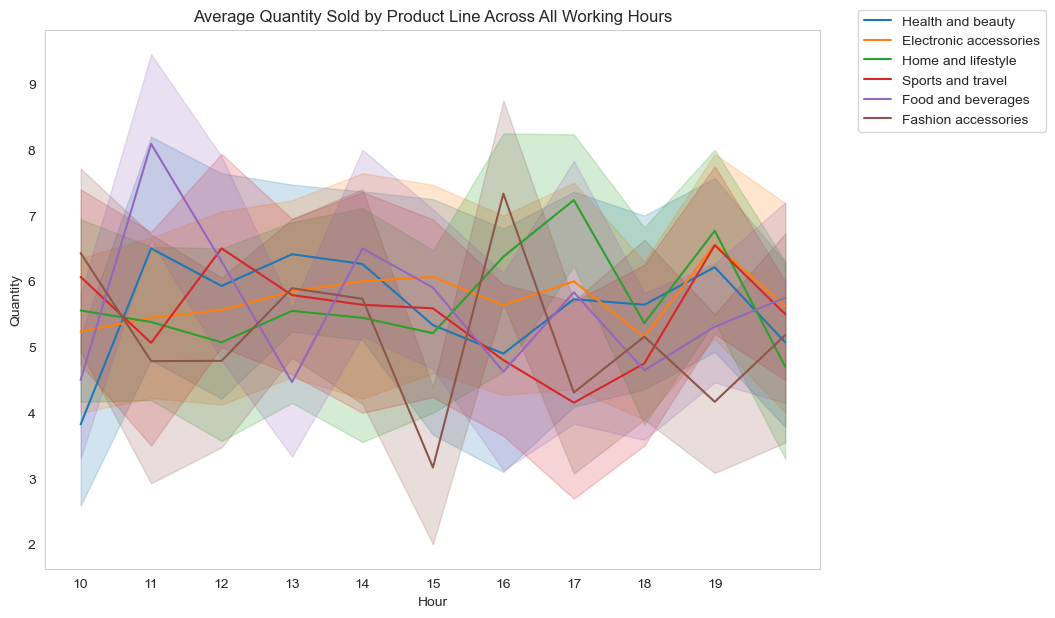

In [140]:
# Plot the data
plt.figure(figsize=(10, 7))
sns.lineplot(
    x="Hour",
    y="Quantity",
    data=data,
    hue="Product line",  # Corrected: changed "Product_line" to "Product line"
    estimator=np.mean,
)

plt.xticks(range(10, 20))  # Set x-axis ticks for each hour
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.title("Average Quantity Sold by Product Line Across All Working Hours")
plt.grid()
plt.show()

## Number of Sales of Each Branch (City) by the Hour

- #### in A (Yangon) it increase between 14 to 15 to get to its peak hours
- #### in B (Mandalay) it increase between 17 to 18 to get to its peak hours
- #### in C (Naypyitaw) it increase between 18 to 19:30 to get to its peak hours

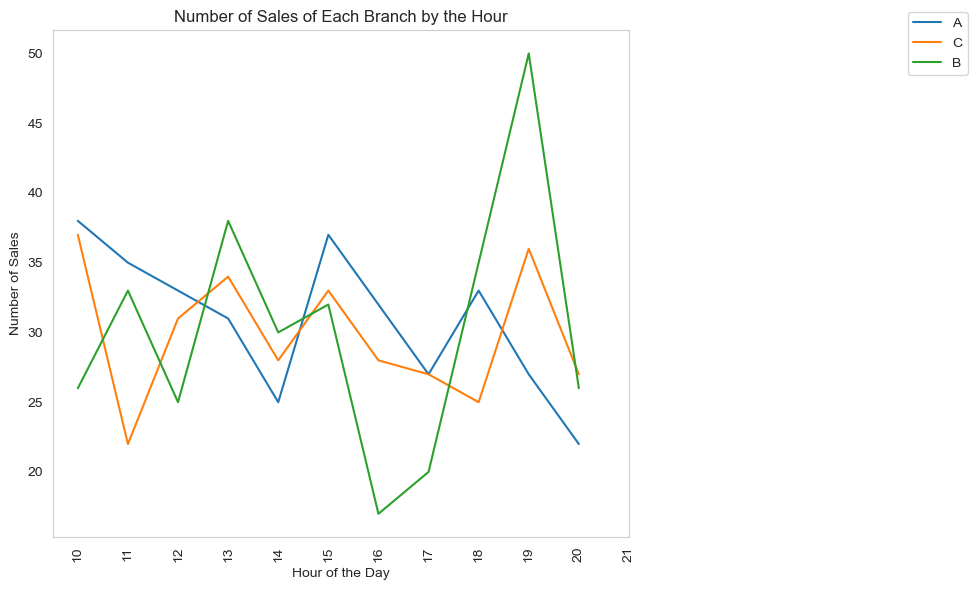

In [141]:
sales = data.groupby(["Branch", "Hour"])["Invoice ID"].count()

unique_branches = data["Branch"].unique()

plt.figure(figsize=(12, 6))
for branch in unique_branches:
    sales[branch].plot(label=branch)

plt.xticks(range(10, 22), rotation="vertical")  # Adjust the range for all hours
plt.legend(bbox_to_anchor=(1.6, 1.05))
plt.grid()
plt.title("Number of Sales of Each Branch by the Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Sales")
plt.tight_layout()
plt.show()

## the following code shows the distribution for each numerical column

- ### in the cogs and tax 5% and total and gross income since they are correlated strongly and positively they have the same distribution which tend to be normal or chi-squared

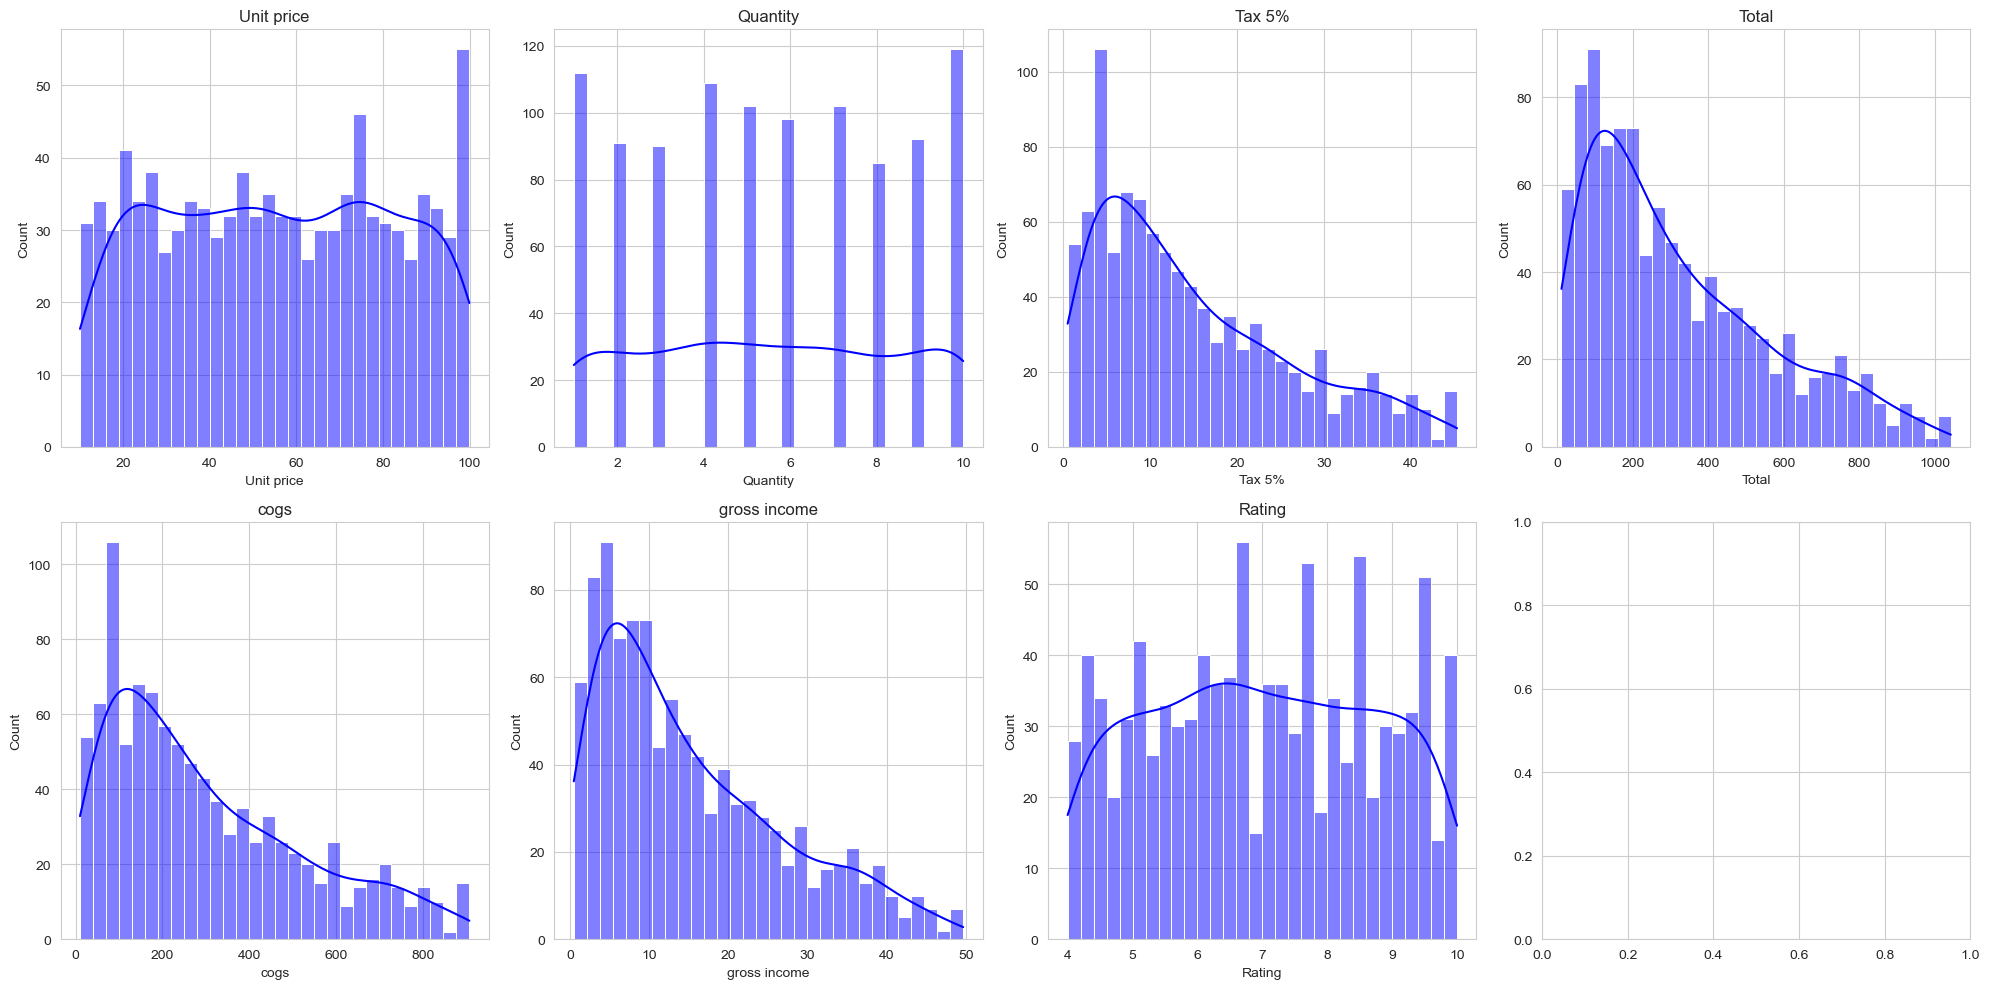

In [142]:
numerical_cols = data.select_dtypes(include="number").columns
numerical_cols = [col for col in numerical_cols if col != "gross margin percentage"]

num_cols = 4
num_rows = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_cols):
    if col == "Cluster" or col == "K-Medoids" or col == "Hour" or col == "Month":
        continue
    sns.histplot(data=data, x=col, kde=True, bins=30, color="blue", ax=axes[i])
    axes[i].set_title(col)  # Set the title for each subplot

plt.tight_layout()
plt.show()

## Average Rating of Each Product Line

- ### in the food and bevreages the mean rating is the heighest and the lowest is sports and travel among other mean rating for the product lines but in general they seem to be near in the ratings ranges 

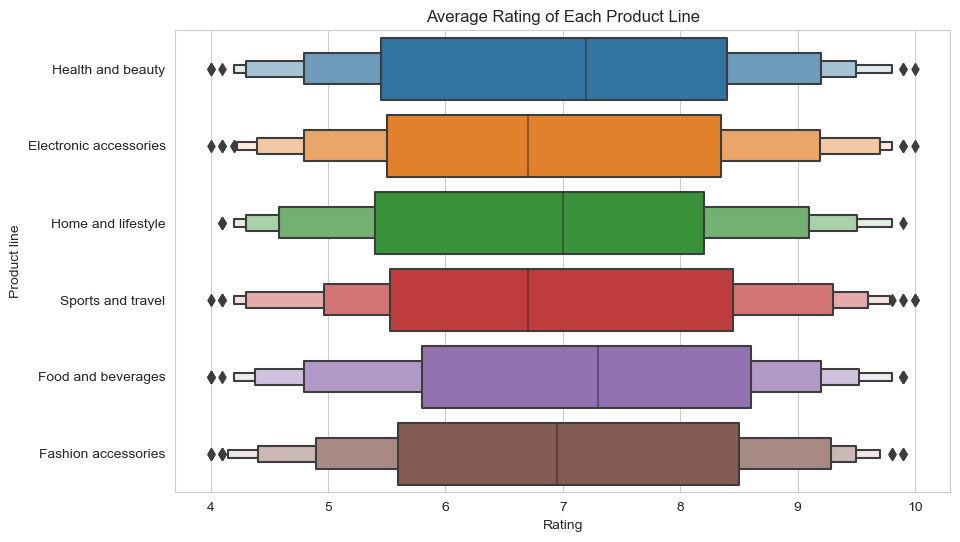

In [143]:
plt.figure(figsize=(10, 6))

sns.boxenplot(y="Product line", x="Rating", data=data)
plt.title("Average Rating of Each Product Line")

plt.show()

## Customer type average spendage with gender

- #### as the bar plot shows it is clear that the female in members and normal customers have the most average spending with near to 325 and males in members like 310 and in normal slightly under 300

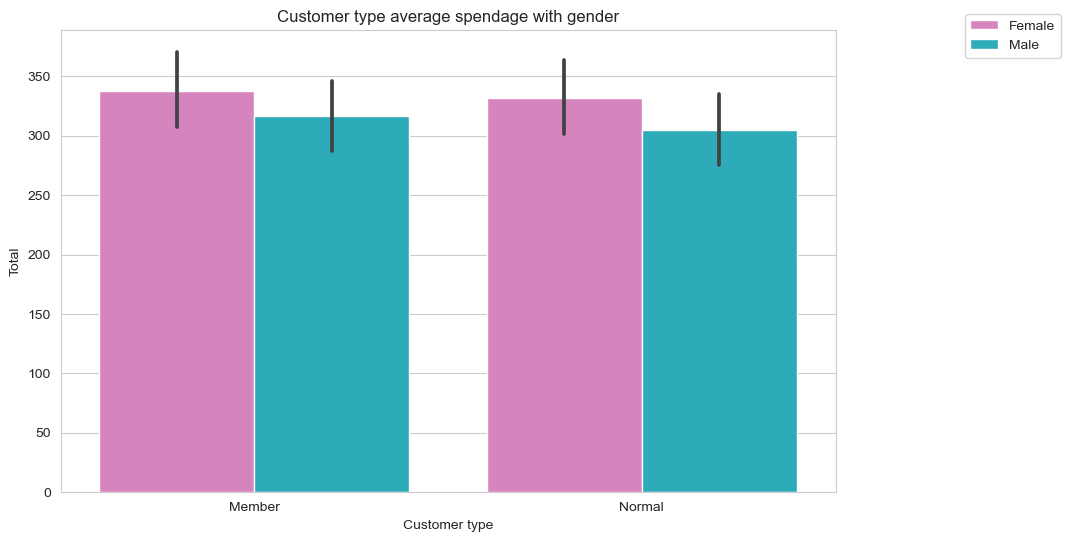

In [144]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Customer type",
    y="Total",
    data=data,

    estimator=np.average,

    hue="Gender",

    palette=["tab:pink", "tab:cyan"],
)

plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.title("Customer type average spendage with gender")
plt.show()

## total sales  by gender

- ### from the given line plot the females total slaes are more than males

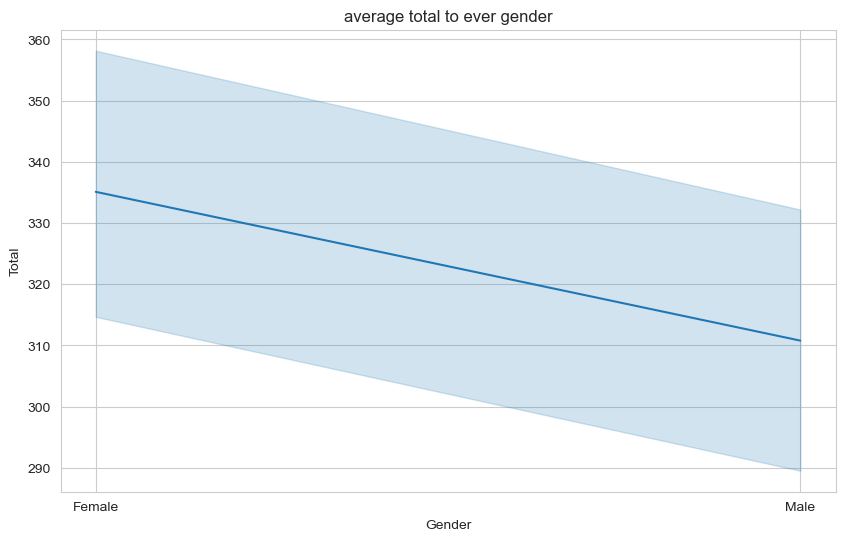

In [145]:
plt.figure(figsize=(10, 6))
genderCount = sns.lineplot(x="Gender", y="Total", data=data).set_title(
    "average total to ever gender"
)

## Distribution of Customer type Level Codes

### this code calculates the frquency of each quantity to each cutomer type 

- #### so as it is clear the member type buys 10, 4, or 1 quantity more than other quantities in frequency

<Figure size 1600x2500 with 0 Axes>

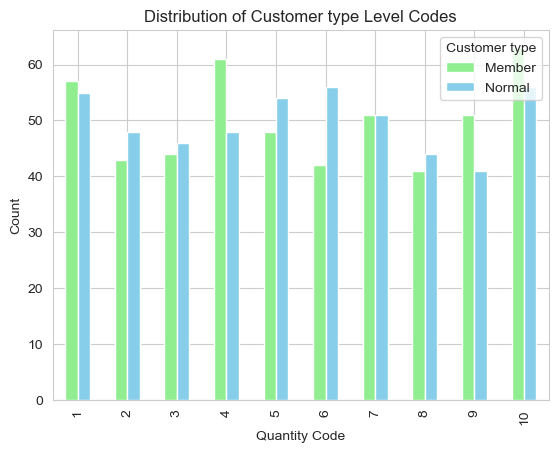

In [146]:
Quantity_CT = pd.crosstab(data["Quantity"], data["Customer type"])
plt.figure(figsize=(16, 25))
Quantity_CT.plot(kind="bar", color=["lightgreen", "skyblue"])
plt.title("Distribution of Customer type Level Codes")
plt.xlabel("Quantity Code")
plt.ylabel("Count")
plt.show()

# extract month column from date time column

In [147]:
def extract_month(datetime_str):
    datetime_obj = datetime.strptime(datetime_str, "%Y-%m-%d %H:%M")
    return datetime_obj.month
# Apply the function to the "DateTime" column to create the "Month" column
data["Month"] = data["DateTime"].apply(extract_month)
# Display the DataFrame
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,DateTime,Hour,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08,13,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29,10,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23,13,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33,20,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37,10,2


## Average Rating of each branch every month

- ### as the graph shows the ratings are approximately equal

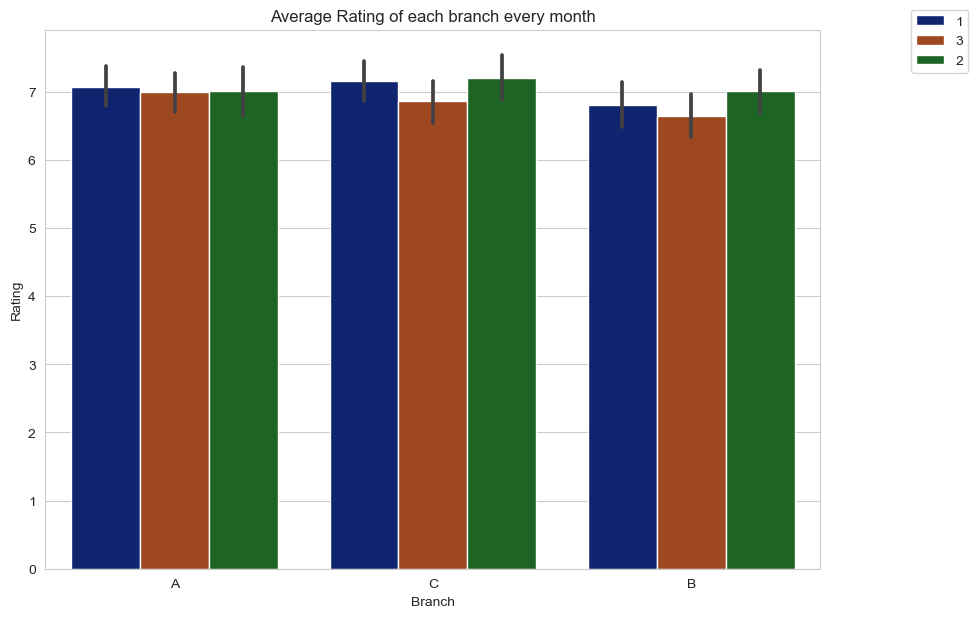

array(['1', '3', '2'], dtype=object)

In [148]:
data["Month"] = data["Month"].astype(str)
palette_color = sns.color_palette("dark")


plt.figure(figsize=(10, 7))
sns.barplot(
    x="Branch",
    y="Rating",
    data=data,

    estimator=np.mean,
    hue="Month",
    palette=palette_color,
)

plt.title("Average Rating of each branch every month")
plt.legend(bbox_to_anchor=(1.2, 1.05))

plt.show()
data["Month"].unique()

#  Calculate the count of data points per hour using 


In [149]:
sum_hour = data.groupby("Hour").count()
sum_hour

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,DateTime,Month
Hour,,,,,,,,,,,,,,,,,
10,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101
11,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
12,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89
13,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103
14,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
15,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
16,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
17,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
18,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93


 # Calculate the average rating per hour

In [150]:
avg_rating = data.groupby("Hour")["Rating"].mean()
avg_rating

Hour
10    7.098020
11    6.806667
12    7.300000
13    7.030097
14    6.934940
15    6.876471
16    6.859740
17    6.939189
18    7.187097
19    6.716814
20    6.977333
Name: Rating, dtype: float64

## Count of Sales by Hour

- ### from 15 to 18 it is leat sales hours
- ### from 18 to 19 is the heighest sales hours

Text(0, 0.5, 'Count')

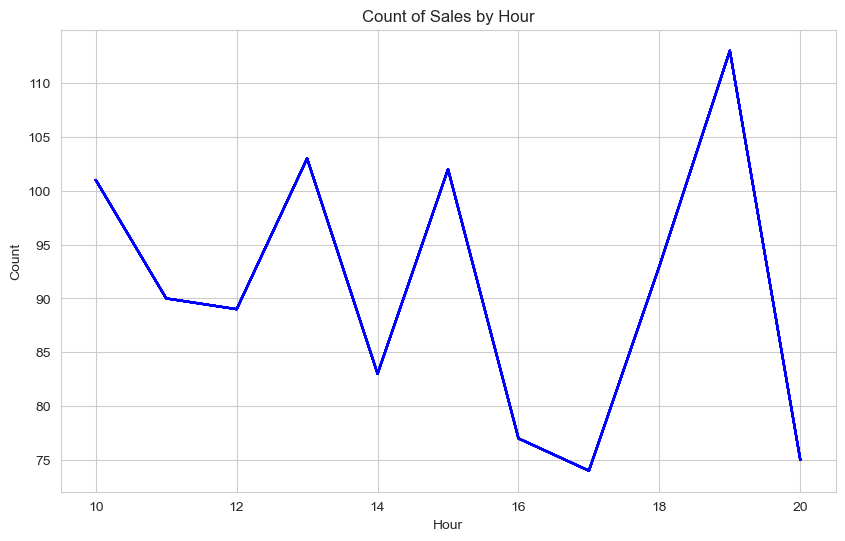

In [151]:
plt.figure(figsize=(10, 6))
plt.plot(sum_hour.index, sum_hour.values, color="blue")

plt.title("Count of Sales by Hour")
plt.xlabel("Hour")

plt.ylabel("Count")

# Function to decide how many clusters to use in kmediod clustering


In [152]:
def optimise_kmedoids(data, max_k):
    means = []
    intertias = []

    for k in range(1, max_k):
        kmedoids = KMedoids(n_clusters=k)
        kmedoids.fit(data)

        means.append(k)
        intertias.append(kmedoids.inertia_)
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, intertias, "o-")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Intertia")
    plt.grid(True)
    plt.show()

# Perform K-Medoids clustering on the 'Unit price' and 'Rating'

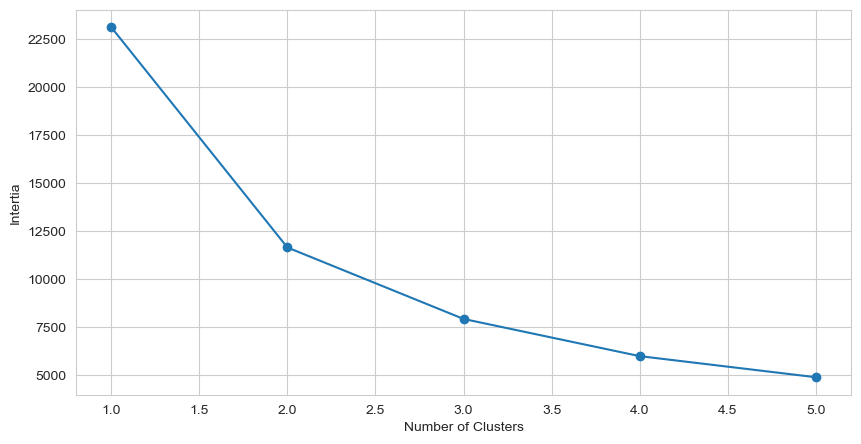

In [153]:
optimise_kmedoids(data[["Unit price", "Rating"]], 6)

# We land on 3 clusters

In [164]:
kmedoids = KMedoids(n_clusters=2)

In [165]:
kmedoids.fit(data[["Unit price", "Rating"]])

KMedoids(n_clusters=2)

## Adding clusters column to the dataset


In [166]:
data["K-Medoids"] = kmedoids.predict(data[["Unit price", "Rating"]])
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,DateTime,Hour,Month,K-Medoids,Cluster
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08,13,1,0,2
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29,10,3,1,1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23,13,3,1,0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33,20,1,0,0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37,10,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2,2019-01-29 13:46,13,1,1,3
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,12.0880,1022.4900,Ewallet,241.76,4.761905,48.6900,4.4,2019-03-02 17:16,17,3,0,2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7,2019-02-09 13:22,13,2,1,3
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1,2019-02-22 15:33,15,2,0,3


## Visualising the results

- ### the 0 cluster it is sales between 10-40

- ### the 1 cluster it is sales between 40-70

- ### the 2 cluster it is sales between 70-100

## in general the ratings ranges are equal

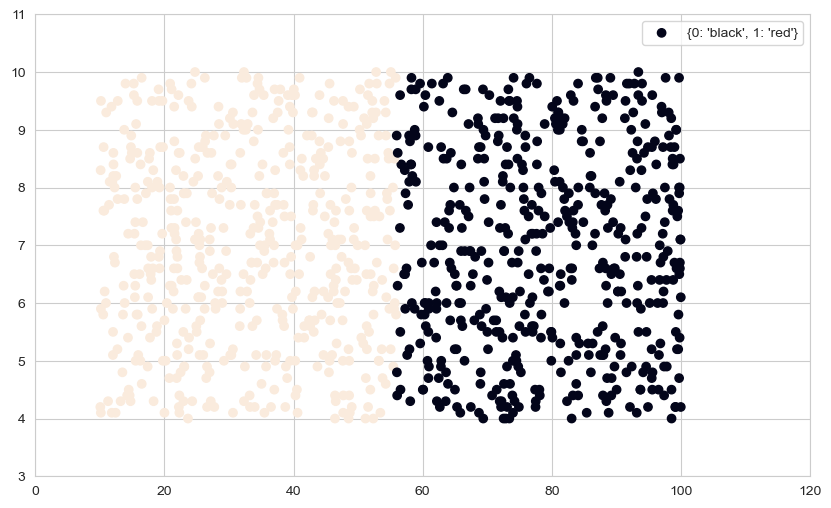

In [172]:
plt.figure(figsize=(10, 6))
cluster_names = {
    0: "black",
    1: "red",
    # Add more cluster names if needed
}


plt.scatter(x=data["Unit price"], y=data["Rating"], c=data["K-Medoids"])
plt.xlim(0, 120)
plt.ylim(3, 11)
plt.legend(labels=[cluster_names])
plt.show()

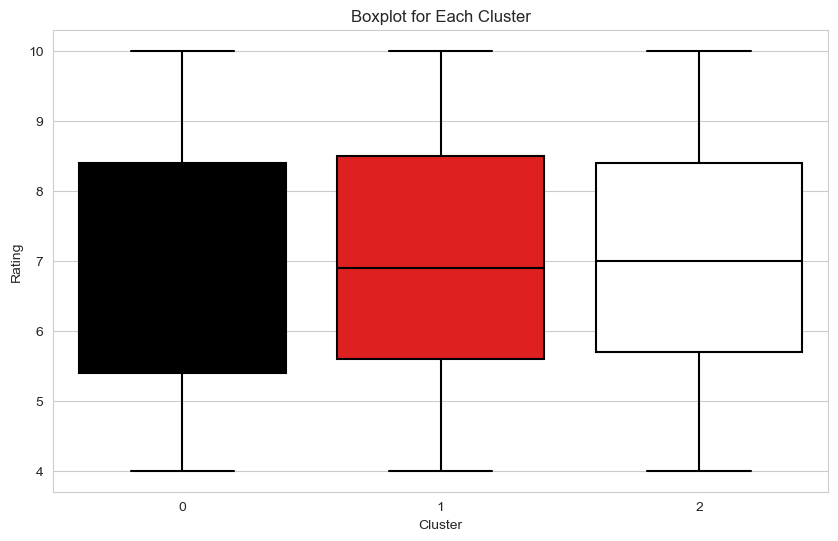

In [158]:
cluster_names = {0: "black", 1: "red", 2: "white"}



plt.figure(figsize=(10, 6))
sns.boxplot(x="K-Medoids", y="Rating", data=data, palette=cluster_names.values())
plt.title("Boxplot for Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Rating")
plt.show()

### A silhouette score of 0.57 indicates a reasonably good clustering result, where the clusters are well-separated and distinct from each other.

In [168]:
silhouette_avg = silhouette_score(data[["Unit price", "Rating"]], data["K-Medoids"])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6215073938259331


 #  creates a scatter plot of Quantity vs Total 
 
 - ### as the scatter plot shows when the quantity increased the sales increases

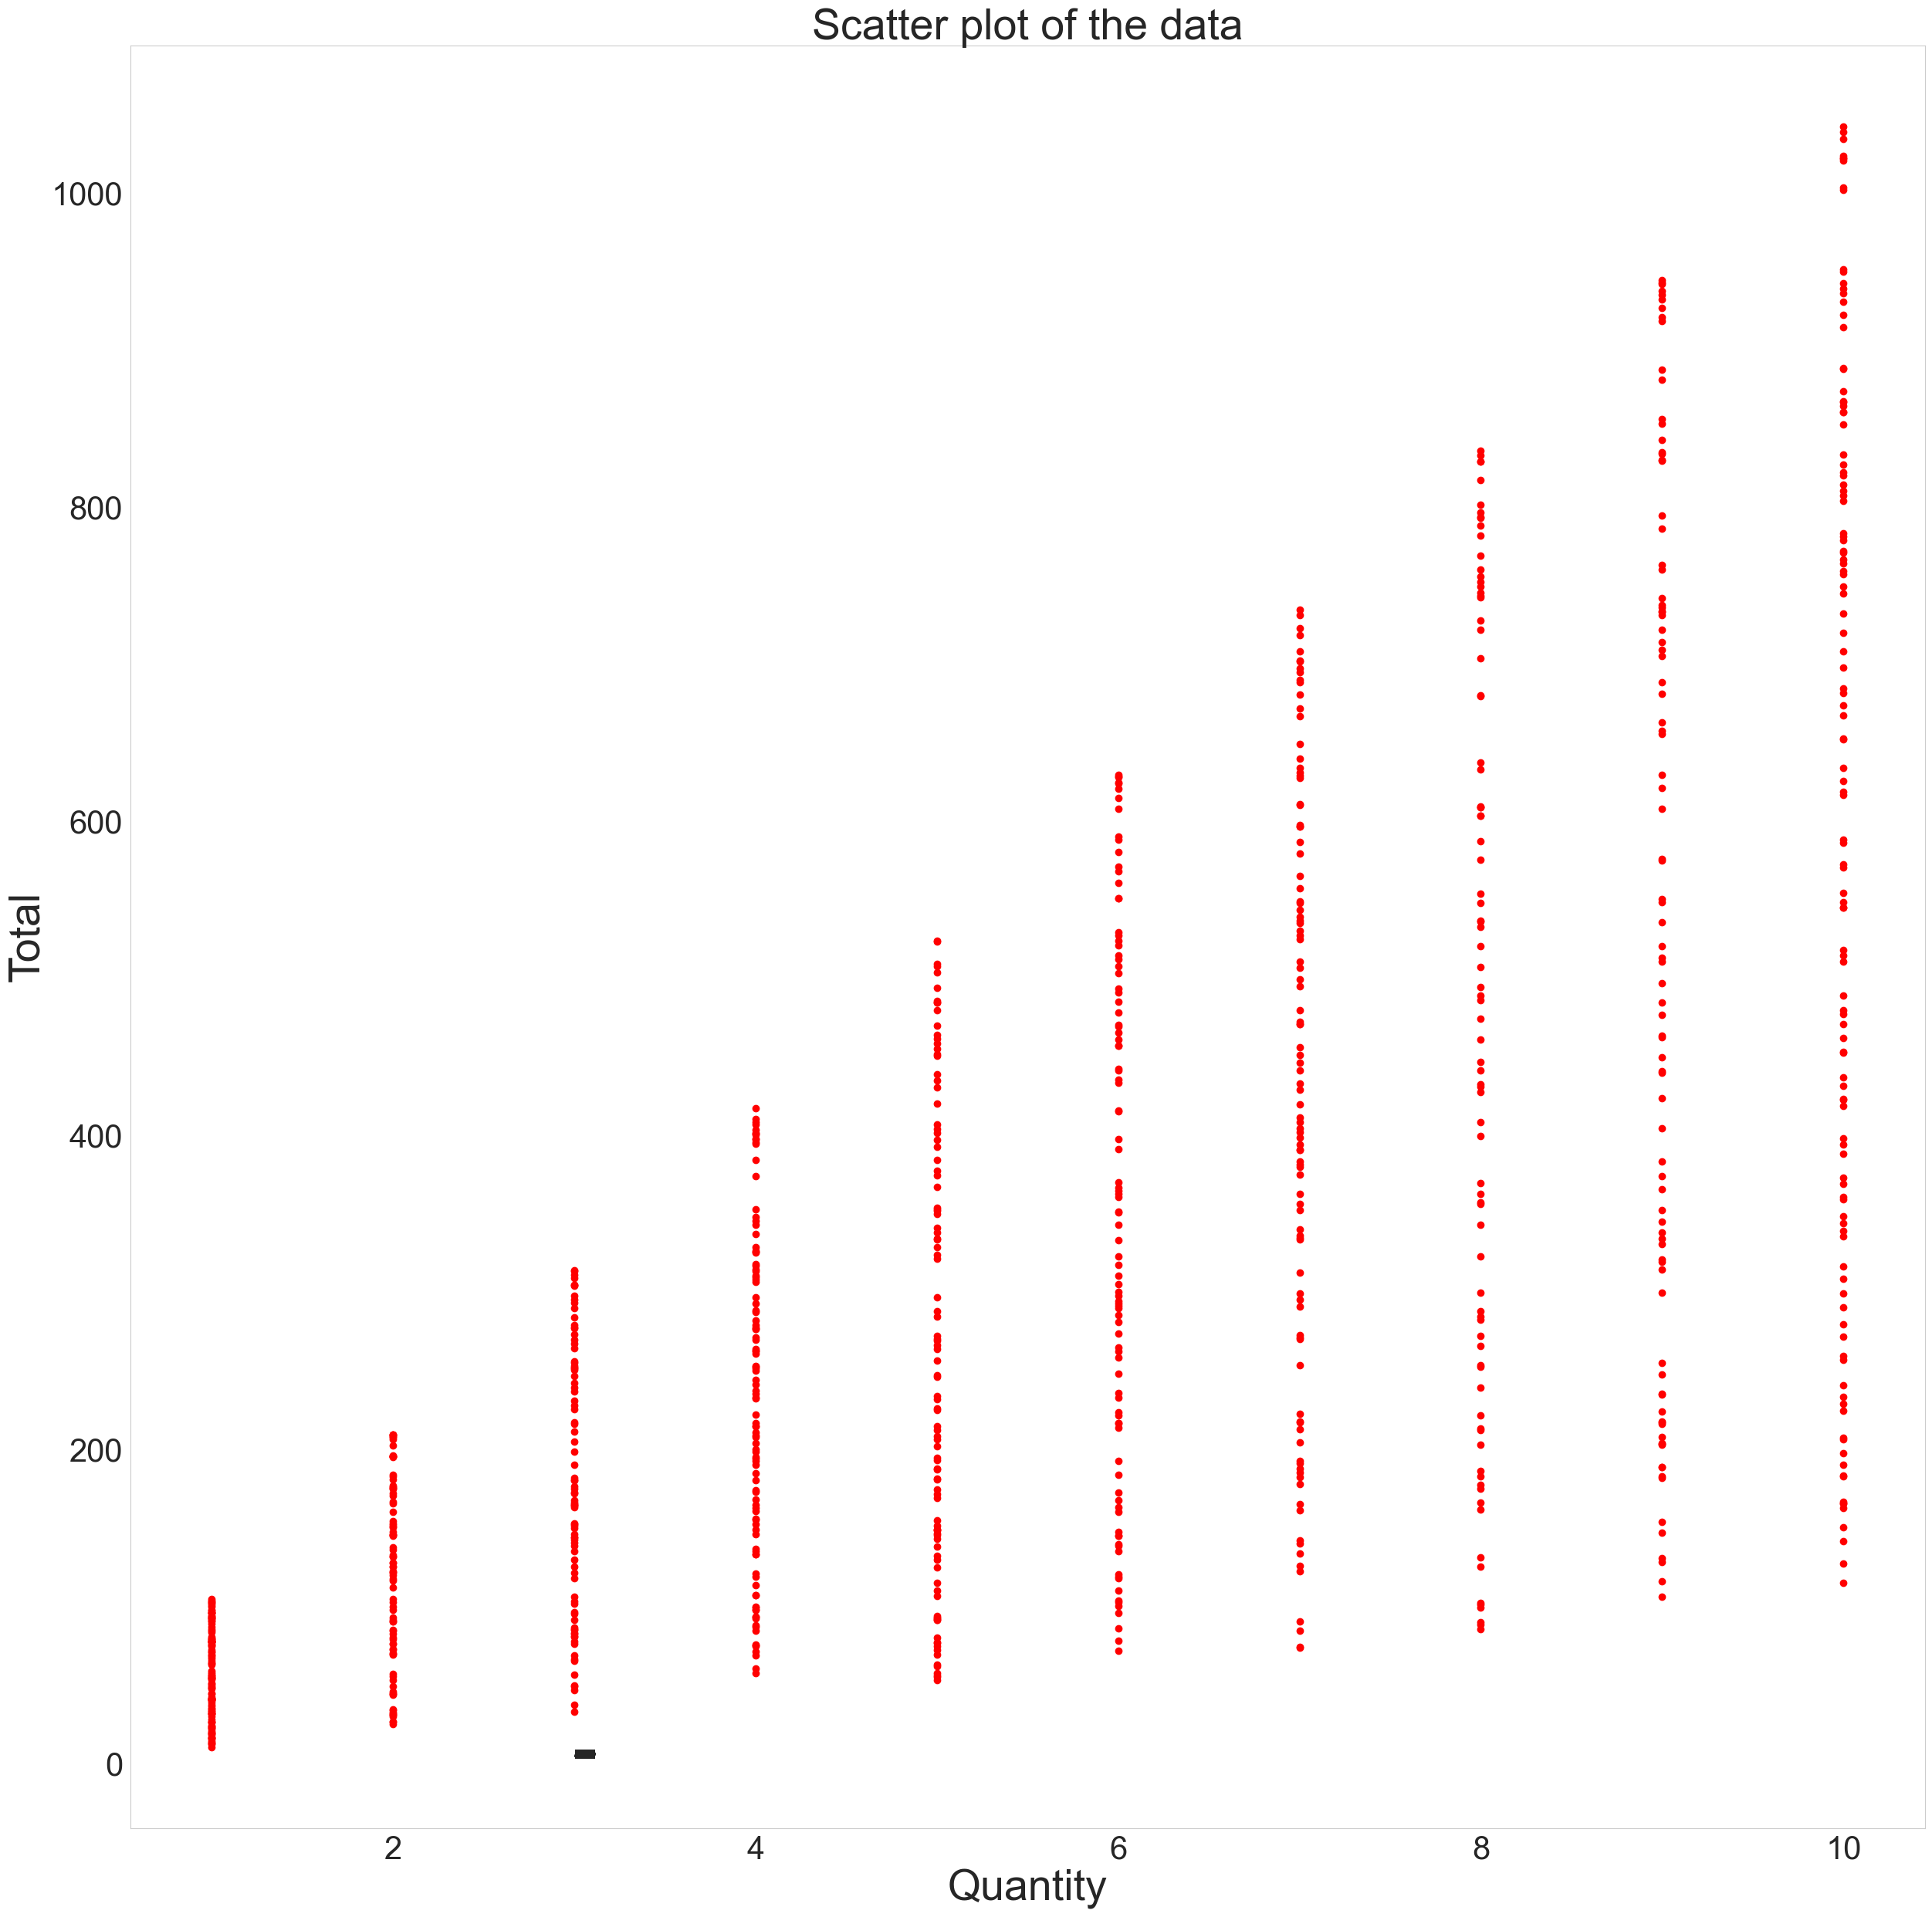

In [169]:
plt.figure(figsize=(30, 30))
plt.scatter(data["Quantity"], data["Total"], c="r")
for i in range(data.shape[0]):
    plt.annotate(
        str(i),
        (data.loc[i, "Quantity"], data.loc[i, "Total"]),
        xytext=(3, 3),
        fontsize=12,
    )  # Set fontsize here
plt.xlabel("Quantity", fontsize=40)
plt.ylabel("Total", fontsize=40)
plt.title("Scatter plot of the data", fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid()
plt.show()

###  Perform hierarchical clustering between Total and quantity
###  Perform dendrogram for  hierarchical clustering
### we add truncation at a specific level (`truncate_mode='level'`) and a maximum of four  levels (`p=4`).


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

       Payment    cogs  gross margin percentage  gross income  Rating  \
0      Ewallet  522.83                 4.761905       26.1415     9.1   
1         Cash   76.40                 4.761905        3.8200     9.6   
2  Credit c

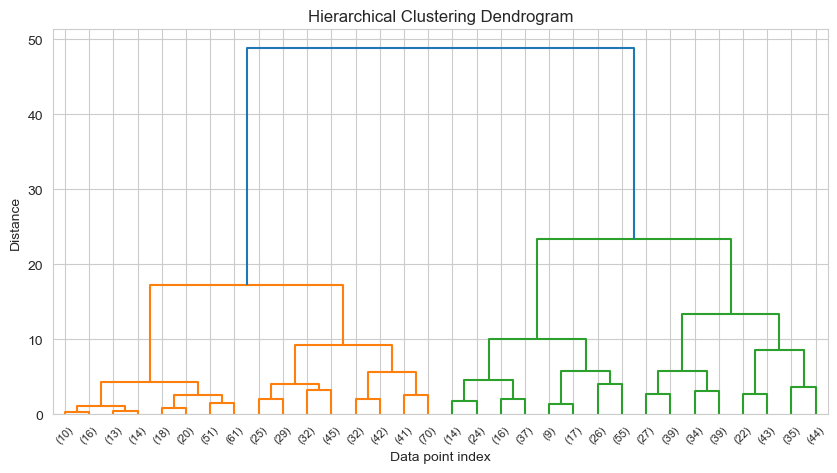

In [161]:
# Select relevant columns for clustering
X = data[["Quantity", "Total"]]  

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=4)
clusters = clustering.fit_predict(X_scaled)

# Add cluster labels to DataFrame
data["Cluster"] = clusters

print(data.head())

# Perform hierarchical clustering for dendrogram
Z = linkage(X_scaled, "ward")

# Plot dendrogram
plt.figure(figsize=(10, 5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data point index")
plt.ylabel("Distance")
dendrogram(Z, truncate_mode="level", p=4)
plt.show()

# we found that best number of clusters is 4
# creates a scatter plot with clustered groups based on the Quantity and Total column


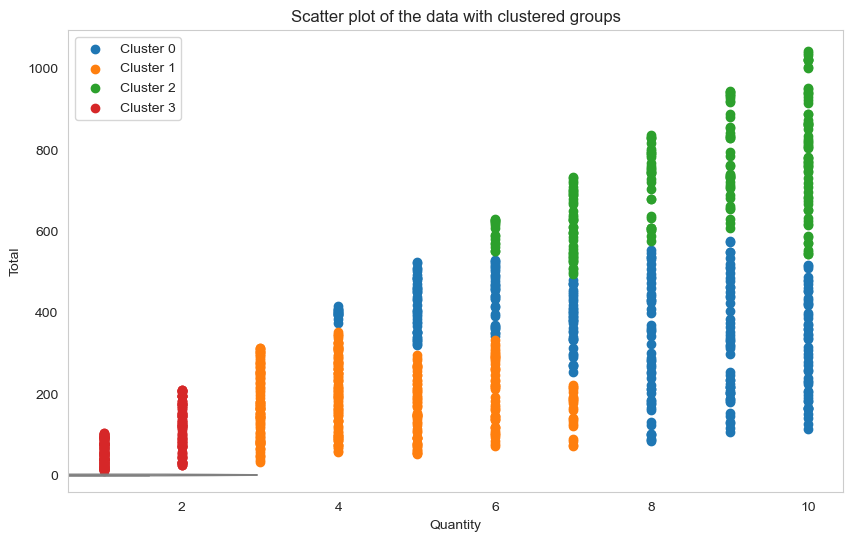

In [162]:
max = builtins.max
# Plot scatter plot
plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    plt.scatter(
        data.loc[clusters == cluster, "Quantity"],
        data.loc[clusters == cluster, "Total"],
        label=f"Cluster {cluster}",
    )

# Draw circles around clusters
for cluster in np.unique(clusters):
    cluster_center = np.mean(X_scaled[clusters == cluster], axis=0)
    radius = max(
        np.linalg.norm(
            X_scaled[clusters == cluster].astype("int") - cluster_center, axis=1
        )
    )
    circle = plt.Circle(cluster_center, radius, color="gray", fill=False)
    plt.gca().add_artist(circle)

plt.xlabel("Quantity")
plt.ylabel("Total")
plt.title("Scatter plot of the data with clustered groups")
plt.legend()
plt.grid()
plt.show()

### The Cophenetic Correlation Coefficient of approximately 0.678 indicates a reasonably good fit between the hierarchical clustering dendrogram and the original pairwise distance matrix of your data. 

In [163]:
c, coph_dists = cophenet(Z, pdist(X_scaled))
print(f"Cophenetic Correlation Coefficient: {c}")

Cophenetic Correlation Coefficient: 0.6780215425859051
